In [ ]:
%%capture
!pip install opencv-contrib-python

In [ ]:
%%capture
!wget https://lviv.travel/image/news/95/d2/95d2286ae6c3639f0b4805081eee9ae818c43ebc_1677659749.jpg -O Img2.jpg
!wget https://5.imimg.com/data5/NL/FU/MY-48841722/apple-fruit-500x500.jpeg  -O Img1.jpg
!wget https://upload.wikimedia.org/wikipedia/en/9/9c/Dark_City_poster.jpg  -O Img3.jpg
!wget https://www.shutterstock.com/image-photo/night-bokeh-light-big-city-260nw-213224278.jpg  -O Img4.jpg

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [ ]:
def image_distortion(img):
    h, w = img.shape[:2]

    center = (w / 2, h / 2)

    M = cv2.getRotationMatrix2D(center, 20, 1)
    rotated = cv2.warpAffine(img, M, (w, h))
    
    img_distorted = rotated[:h//2, :w//2]
    
    return img_distorted

In [ ]:
n_matches = 20
def keypointsAndDescriptors(img):
    sift = cv2.xfeatures2d.SIFT_create()
    return sift.detectAndCompute(img, None)

# calculating Euclidean distance
# using linalg.norm()
def L2_norm(x, y):
    return np.linalg.norm((x - y), ord=1)

def ownMatcher(descriptor1, descriptor2):
    matches = []

    for i, el1 in enumerate(descriptor1):
        for j, el2 in enumerate(descriptor2):
            matches.append(
                cv2.DMatch(
                    _distance=L2_norm(el1, el2),
                    _imgIdx=0,
                    _queryIdx=i,
                    _trainIdx=j
                )
            )
    return matches

def drawMatcher(image1, image2, descriptors1, descriptors2, keypoints1, keypoints2, matches, title):
    plt.figure(figsize=(25, 15))
    plt.axis('off')
    match_img = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.title(f'{title}', fontsize=30)
    plt.axis('off')
    plt.imshow(match_img)
    plt.show()

def compare_matchers(des1, des2):
    start = datetime.now()
    matches12_own = ownMatcher(des1, des2)
    print("Custom Brute Force matcher took:", datetime.now() - start)

    start = datetime.now()
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches12_bf = bf.match(des1, des2)
    print("CV2 Brute Force matcher took:", datetime.now() - start)

    return matches12_own, matches12_bf

def pipeline(img1, img2):
    figure, ax = plt.subplots(1, 2, figsize=(16, 8))

    ax[0].imshow(img1)
    ax[1].imshow(img2)

    kp1, des1 = keypointsAndDescriptors(img1)
    kp2, des2 = keypointsAndDescriptors(img2)

    matches_own, matches_bf = compare_matchers(des1, des2)

    best_matches_own = sorted(matches_own, key=lambda x: x.distance)
    best_matches_own = best_matches_own[:n_matches]

    best_matches_bf = sorted(matches_bf, key=lambda x: x.distance)
    best_matches_bf = best_matches_bf[:n_matches]

    drawMatcher(img1, img2, des1, des2, kp1, kp2, best_matches_own, f"Own Brute Force Matcher( {n_matches} matches)")
    drawMatcher(img1, img2, des1, des2, kp1, kp2, best_matches_bf, f"CV2 Brute Force Matcher ( {n_matches} matches)")
    
    return des1, des2, matches_own, matches_bf

In [ ]:
image_1 = cv2.imread('Img1.jpg', cv2.COLOR_BGR2RGB)
image_2 = cv2.imread('Img2.jpg', cv2.COLOR_BGR2RGB)
image_3 = cv2.imread('Img3.jpg', cv2.COLOR_BGR2RGB)
image_4 = cv2.imread('Img4.jpg', cv2.COLOR_BGR2RGB)

image_crop_1 = image_distortion(image_1)
image_crop_2 = image_distortion(image_2)
image_crop_3 = image_distortion(image_3)
image_crop_4 = image_distortion(image_4)

Custom Brute Force matcher took: 0:00:02.889103
CV2 Brute Force matcher took: 0:00:00.033857


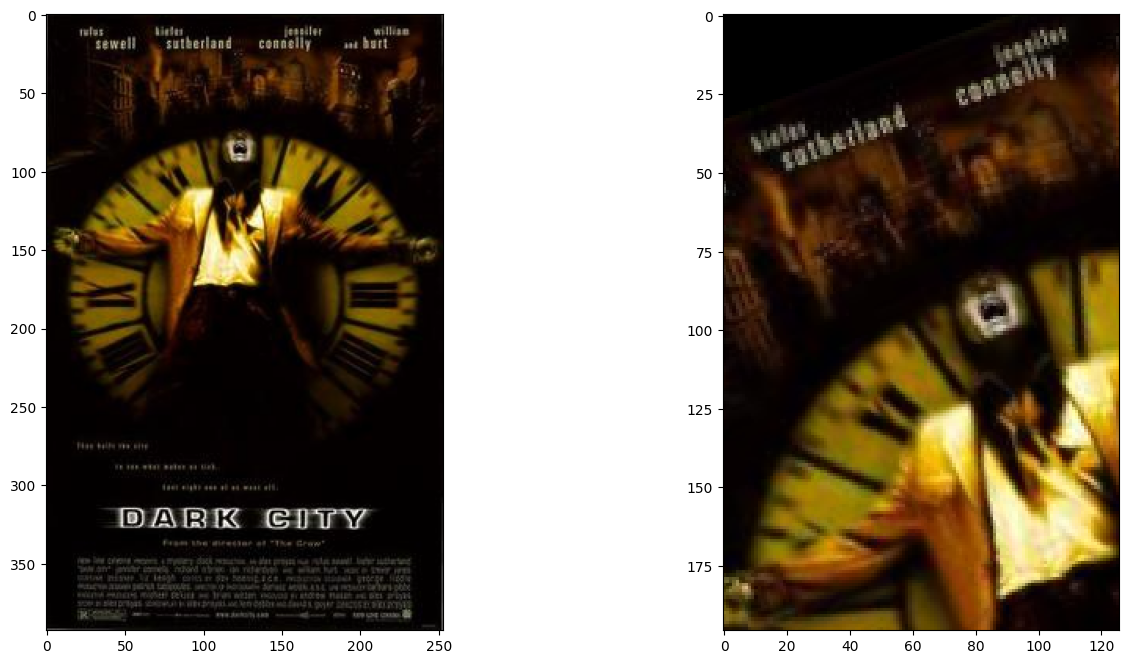

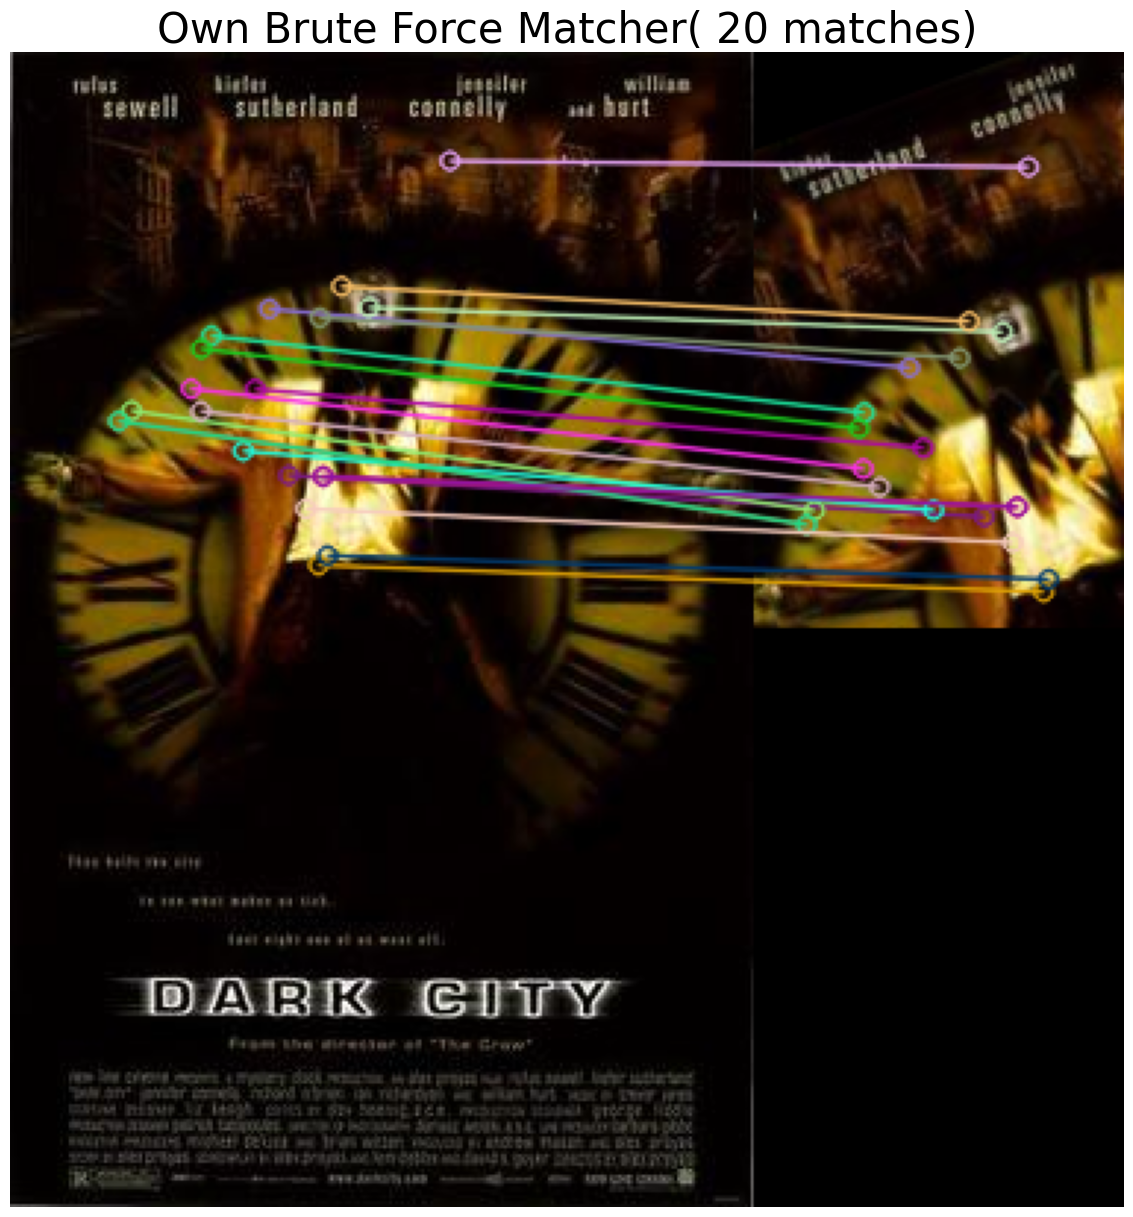

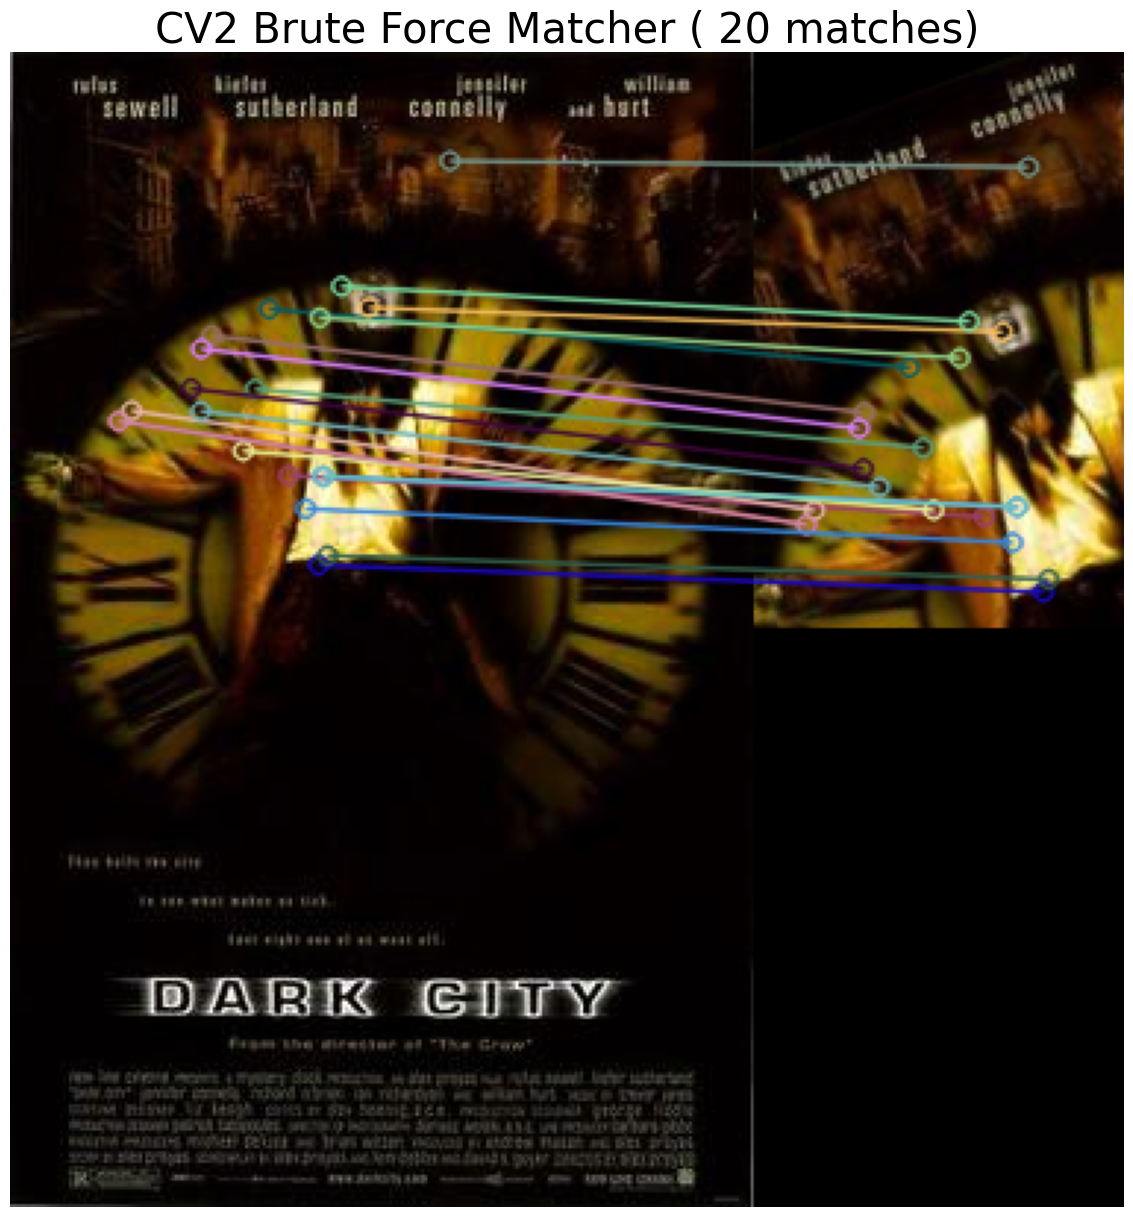

In [ ]:
des3, des4, matches_own, matches_bf = pipeline(image_3, image_crop_3)

Custom Brute Force matcher took: 0:00:00.665084
CV2 Brute Force matcher took: 0:00:00.005991


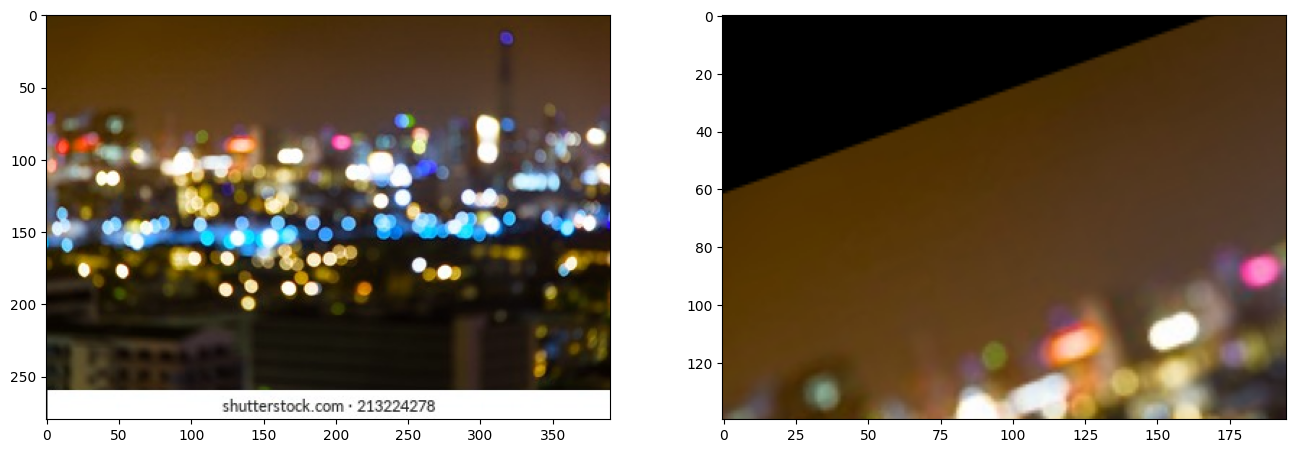

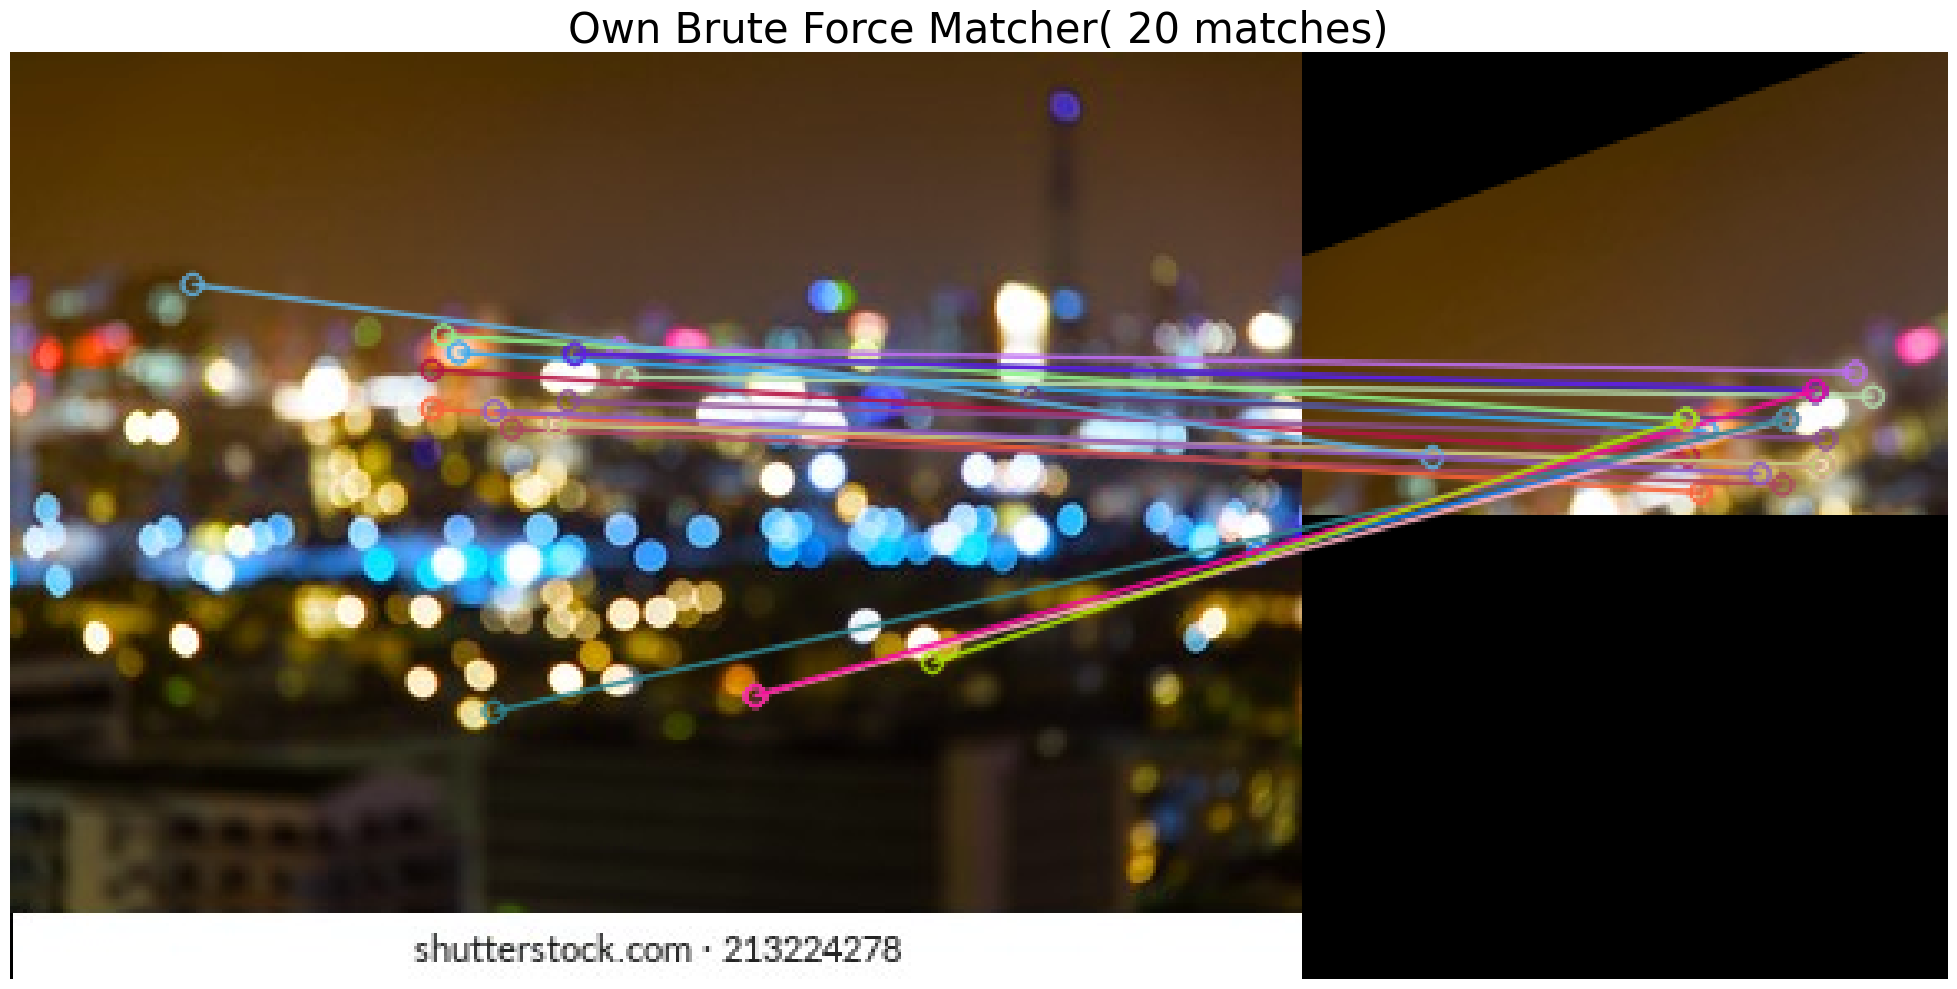

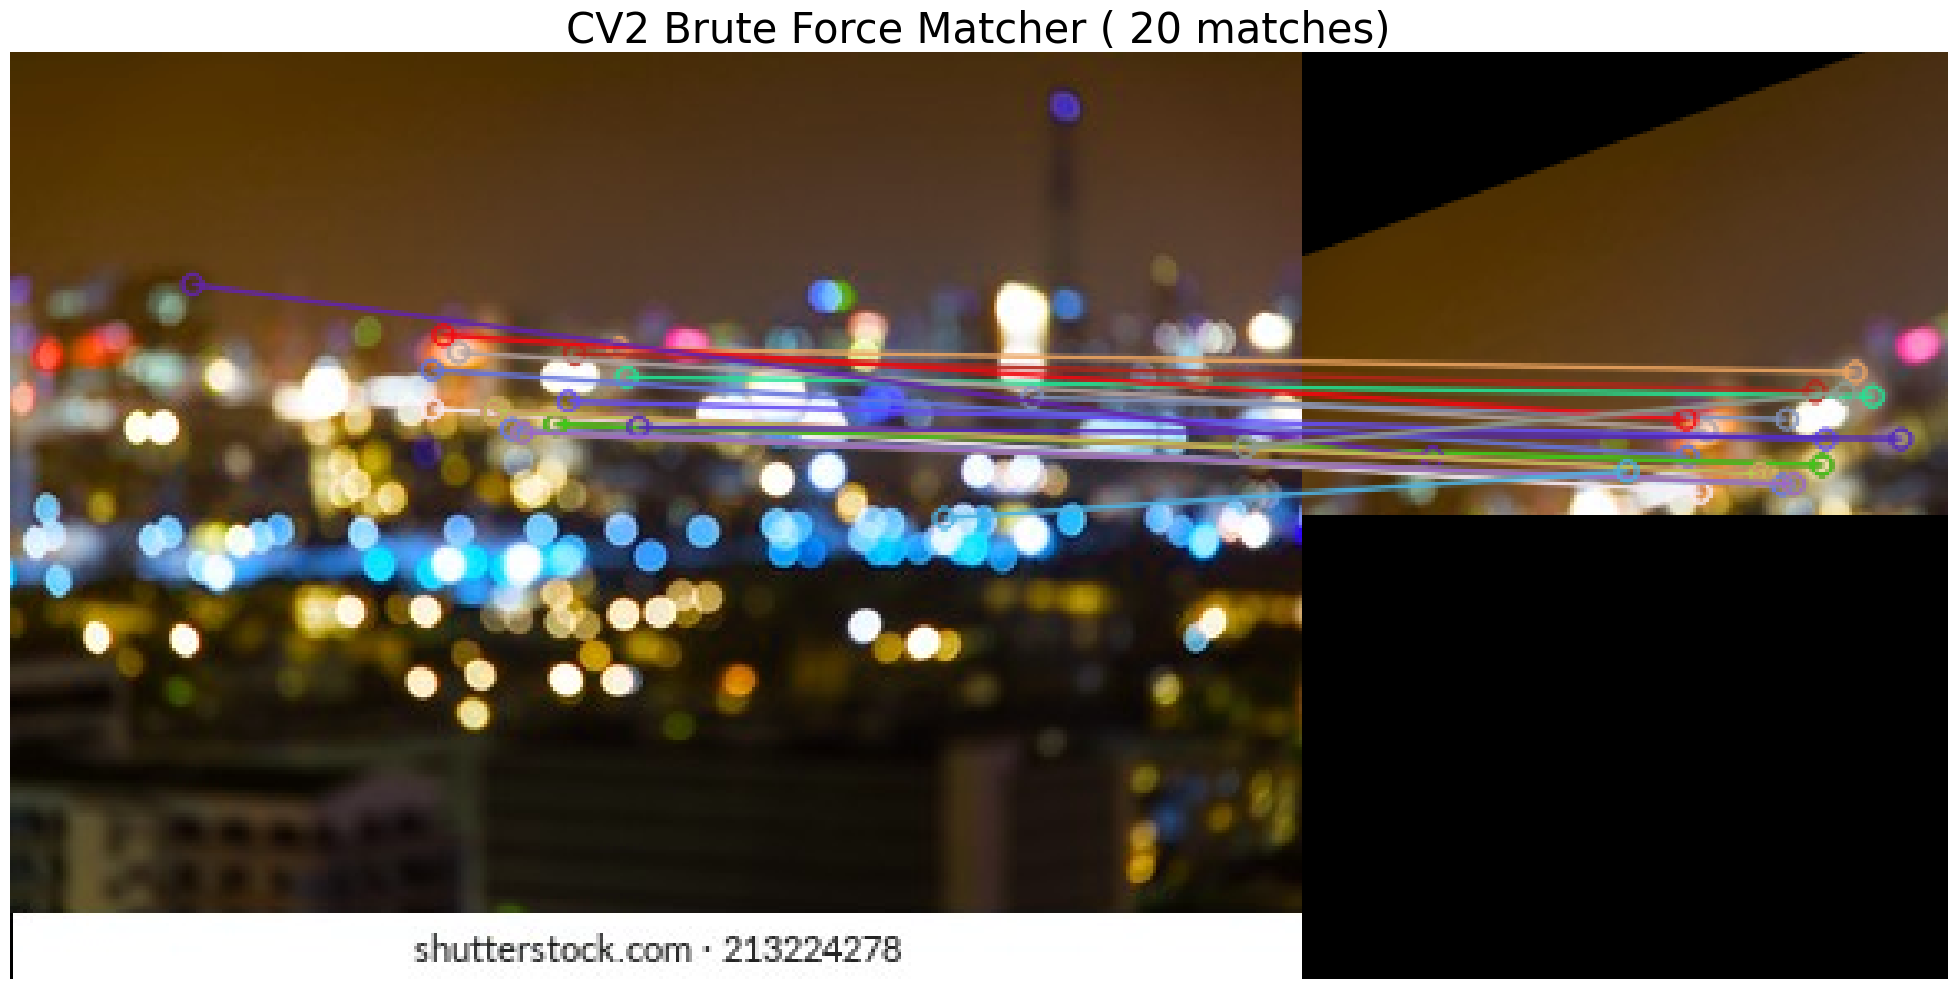

In [ ]:
des3, des4, matches_own, matches_bf = pipeline(image_4, image_crop_4)

Custom Brute Force matcher took: 0:00:00.796570
CV2 Brute Force matcher took: 0:00:00.035090


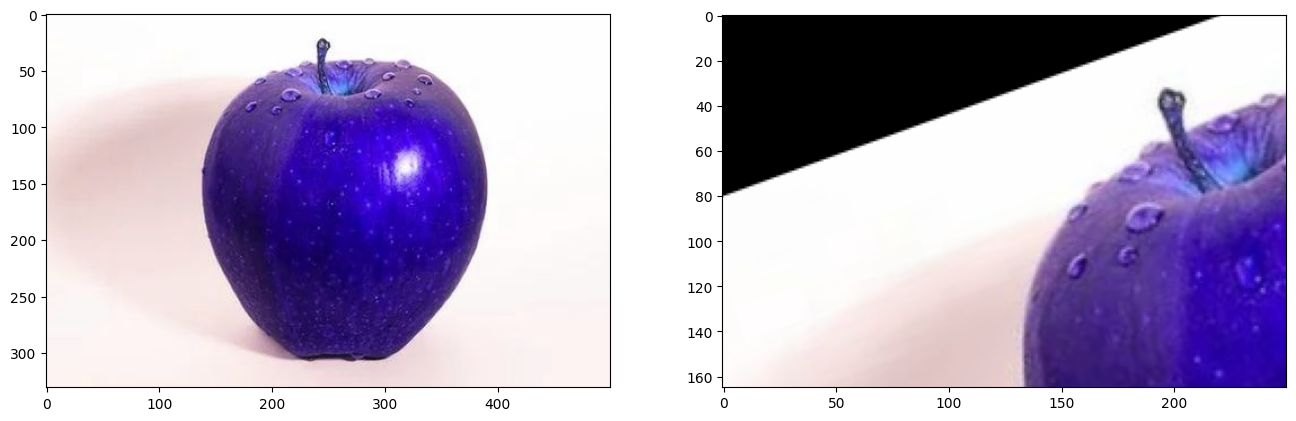

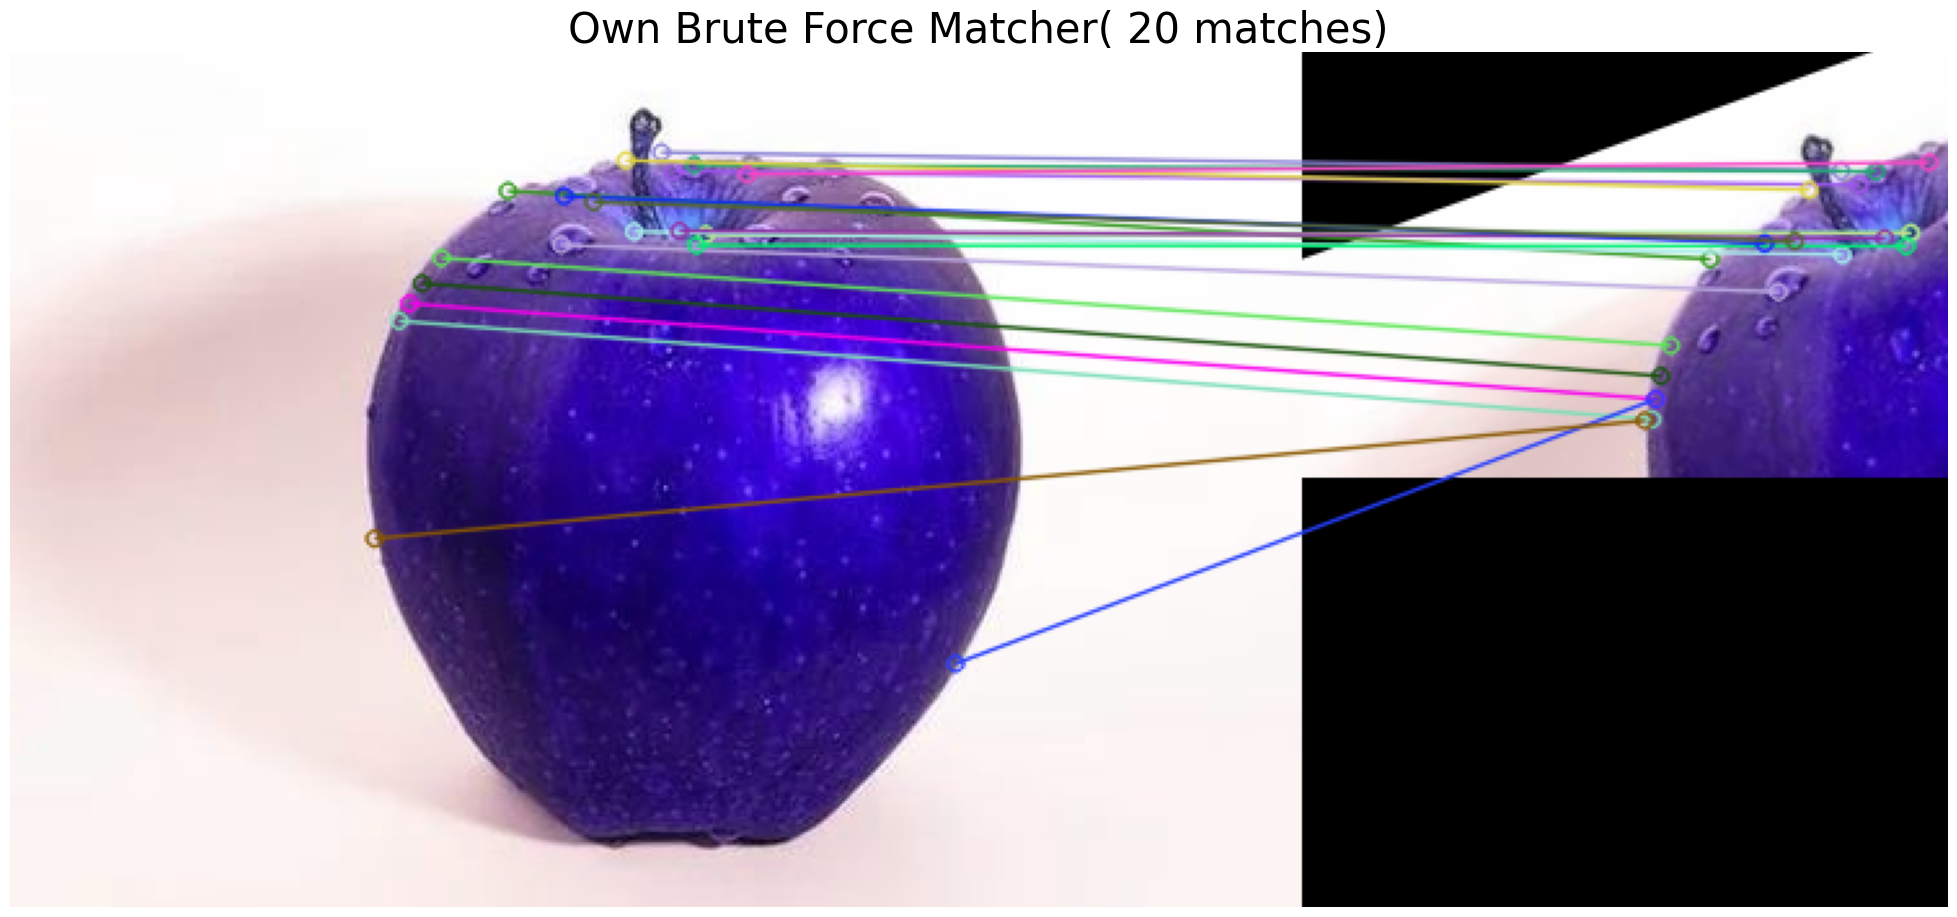

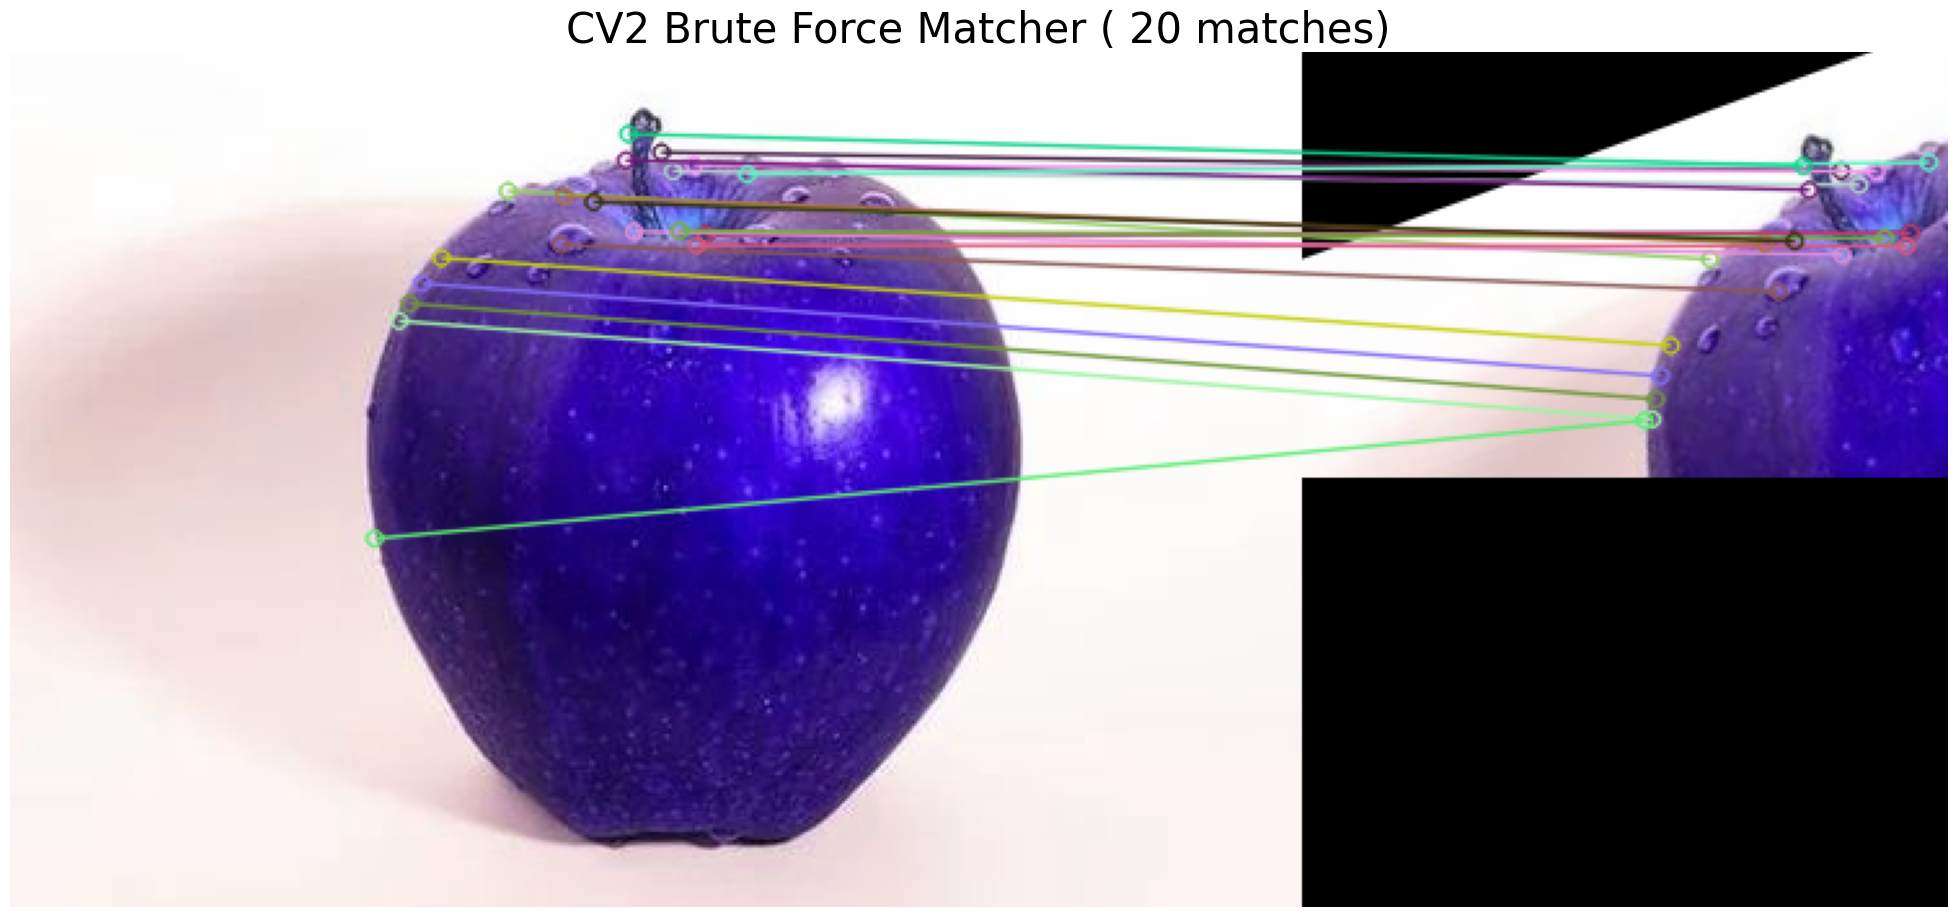

In [ ]:
des3, des4, matches_own, matches_bf = pipeline(image_1, image_crop_1)